# Evaluating Semantics

In [1]:
import os
import json
import nltk
import pandas as pd
from collections import Counter
from nltk.corpus import wordnet
from collections import Counter
from nltk import WordNetLemmatizer

In [54]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/oksder/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Corpus stats

In [55]:
corpus = ''
for root, dirs, files in os.walk("/Users/oksder/Dropbox/Библиотека/NUIG/Corpora/Irish"):
    for file in files:
        if file.endswith(".txt"):
            with open(os.path.join(root, file), 'r', encoding='utf-8') as f:
                corpus += f.read()
                
cleaned_corpus = [w.strip(",.1?`'\n-;:") for w in corpus.lower().split()]
cleaned_corpus = [w for w in cleaned_corpus if len(w) > 3]

In [56]:
counts = Counter(cleaned_corpus)
counts.most_common(300)

[('agus', 19911),
 ('ocus', 9341),
 ('meic', 8629),
 ('isin', 8196),
 ('acht', 7916),
 ('gach', 6686),
 ('nach', 5565),
 ('cath', 4890),
 ('féin', 4698),
 ('cach', 4674),
 ('uile', 4112),
 ('maith', 3999),
 ('leis', 3963),
 ('uair', 3888),
 ('fein', 3394),
 ('dano', 3156),
 ('cona', 3135),
 ('ingen', 2899),
 ('marbad', 2760),
 ('ainm', 2709),
 ("d'écc", 2569),
 ('fair', 2507),
 ('briain', 2392),
 ('lucht', 2352),
 ('connacht', 2333),
 ('cech', 2255),
 ('marbhadh', 2252),
 ('beith', 2241),
 ('mharbhadh', 2168),
 ('lais', 2149),
 ('domhnaill', 2137),
 ('find', 2088),
 ('fris', 2084),
 ('righ', 2027),
 ('neill', 1983),
 ('dona', 1931),
 ('gurab', 1915),
 ('chulaind', 1901),
 ('h-ua', 1871),
 ('loch', 1848),
 ('fuil', 1835),
 ('dara', 1835),
 ('ed-ón', 1827),
 ('conchobair', 1823),
 ('rígh', 1793),
 ('immorro', 1782),
 ('iarum', 1777),
 ('domnaill', 1748),
 ('cend', 1746),
 ('duine', 1736),
 ('éireann', 1723),
 ('cormac', 1699),
 ('arna', 1683),
 ('gilla', 1673),
 ('fria', 1672),
 ('catha'

In [57]:
counts['snechta']

172

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')

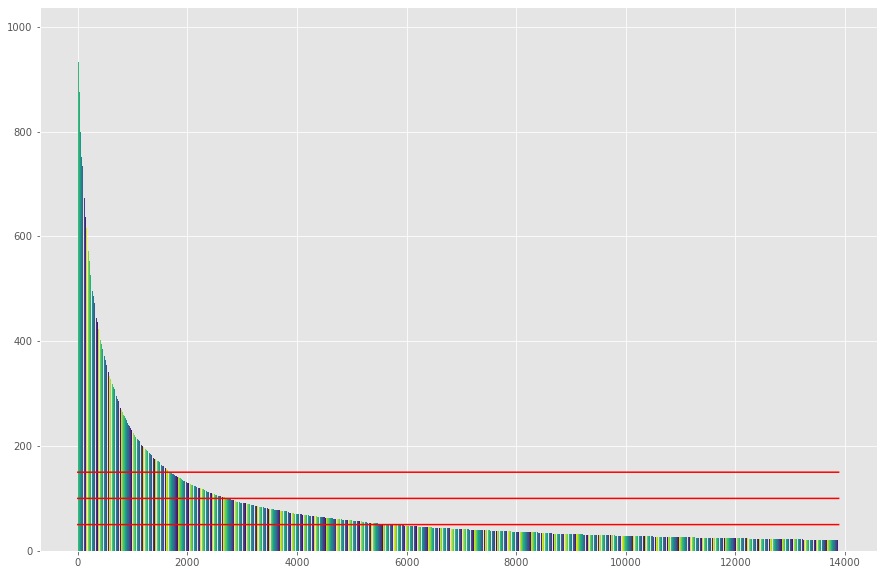

In [59]:
Y = [el[1] for el in counts.most_common() if el[1]>20 and el[1] <1000]
X = range(len(Y))

colors = sns.color_palette('viridis', 20)

plt.figure(figsize=(15, 10))
plt.bar(X, Y, color=colors)
plt.plot(X, [50]*len(X), color='r')
plt.plot(X, [100]*len(X), color='r')
plt.plot(X, [150]*len(X), color='r')
plt.show()

In [60]:
print(len(counts))
print(len(Y))

360755
13883


In [187]:
sum([el[1] for el in counts.most_common()])/len(counts)

6.361081620490361

In [61]:
with open('corpus_counts.json', 'w', encoding='utf-8') as f:
    json.dump(counts, f, ensure_ascii = False)

## Preparing data from the eDIL

In [666]:
wnl = WordNetLemmatizer()

def get_pos(word):
    w_synsets = wordnet.synsets(word)

    pos_counts = Counter()
    pos_counts["n"] = len([item for item in w_synsets if item.pos()=="n"]  )
    pos_counts["v"] = len([item for item in w_synsets if item.pos()=="v"]  )
    pos_counts["a"] = len([item for item in w_synsets if item.pos()=="a"]  )
    pos_counts["r"] = len([item for item in w_synsets if item.pos()=="r"]  )
    
    most_common_pos_list = pos_counts.most_common(3)
    
    # first indexer for getting the top POS from list, 
    # second indexer for getting POS from tuple (POS: count)
    return most_common_pos_list[0][0]

def lemmatize(word):
    return wnl.lemmatize(word, get_pos(word))

def lemmatize_defs(inverted_dil):
    inverted_dil_lemmatized = {}
    for k, v in inverted_dil.items():
        if get_pos(k) == 'v':
            lem_k = lemmatize(k)
        else:
            lem_k = k
        if lem_k in inverted_dil_lemmatized:
            inverted_dil_lemmatized[lem_k] += v
        else:
            inverted_dil_lemmatized[lem_k] = v
    return inverted_dil_lemmatized

In [667]:
with open('parsed_dil.json', 'r', encoding='utf-8') as f:
    parsed_dil = json.load(f)

with open('filtered_inverted_dil.json', 'r', encoding='utf-8') as f:
    inverted_dil = json.load(f)
    
inverted_dil_lemmatized = lemmatize_defs(inverted_dil)

In [668]:
parsed_dil['fo-gaib']['defs']

['dies',
 'discovers',
 'imparts',
 'undergoes',
 'communicates',
 'invents',
 'is able',
 'devises',
 'experiences',
 'causes',
 'induces',
 'meets with',
 'procures',
 'finds in oneself',
 'lives',
 'obtains',
 'gains',
 'gets',
 'presumes',
 'dares',
 'finds',
 'spends']

In [669]:
inverted_dil['gets']

['do-beir', 'fo-gaib', 'ad-cota', 'comaimsigid', 'tárrachtain', 'airnecht']

In [670]:
inverted_dil_lemmatized['get']

['do-beir', 'fo-gaib', 'ad-cota', 'comaimsigid', 'tárrachtain', 'airnecht']

In [671]:
parsed_dil['tárrachtain']

{'defs': ['getting',
  'wish',
  'waiting on',
  'preparing',
  'get',
  'pleasing',
  'obtaining',
  'at sunrise',
  'providing',
  'gratifying',
  'desire',
  'preparation',
  'supplying'],
 'filtered_defs': ['obtaining', 'getting'],
 'first_trans_defs': ['obtaining', 'getting'],
 'forms': ['tárrachtain', 'tairecc'],
 'lemma': 'tárrachtain',
 'trans': ['get',
  'providing, supplying',
  'desire, wish',
  'waiting on, pleasing, gratifying',
  'preparing, preparation',
  'getting, obtaining',
  'at sunrise (?)']}

In [672]:
inverted_dil['cat']

['catt']

In [673]:
with open('filtered_inverted_dil_lemmatized.json', 'w', encoding='utf-8') as f:
    json.dump(inverted_dil_lemmatized, f, ensure_ascii = False, sort_keys=True)

## Analogy: BATS

1. **Encyclopedic semantics**
    * ✖️ **E01**: capitals *(athens:greece)* — 1/50
    * ❓ **E02**: country:language *(bolivia:spanish)* — 7/50
    * ❌ **E03**: uk city:county *(york:yorkshire)*
    * ❌ **E04**: nationalities *(lincoln:american)*
    * ❌ **E05**: occupation *(lincoln:president)*
    * ✖️ **E06**: the young *(cat:kitten)* — 17/50
    * ❓ **E07**: sounds *(dog:bark)* — 25/50
    * ✖️ **E08**: shelter *(fox:den)* — 17/50
    * ✅ **E09**: thing:color *(blood:red)* — 25/50
    * ✖️ **E10**: male:female *(actor:actress)* — 8/50
2. **Lexicographic semantics**
    * ❓ **L01**: hypernyms: animals *(cat:feline)* — 17/50
    * ✖️ **L02**: hypernyms: misc *(plum:fruit, shirt:clothes)* — 13/50
    * ✖️ **L03**: hyponyms: misc *(bag:pouch, color:white)* — 24/50
    * ❓ **L04**: meronyms: substance *(sea: water)* — 22/50
    * ✖️ **L05**: meronyms: member *(player:team)* — 31/50
    * ✖️ **L06**: meronyms: part *(car:engine)* — 18/50
    * ✅ **L07**: synonyms: intensity *(cry:scream)* — 29/50
    * ✅ **L08**: synonyms: exact *(sofa:couch)* — 20/50
    * ✅ **L09**: antonyms: gradable *(clean:dirty)* — 34/50
    * ✅ **L10**: antonyms: binary *(up:down)* — 28/50


In [674]:
def load_bats(path):
    data = {}
    with open(path, 'r', encoding='utf-8') as f:
        for line in f.readlines():
            stimulus, answer = line.split('\t')
            answers = answer.split('/')
            data[stimulus] = [a.strip('\n') for a in answers]
    return data
 
def translate_bats(data, inverted_dil, dump=True):
    translated_data = {}
    for k, v in data.items():
        if k in inverted_dil:
            syndict = {}
            for el in v:
                if el in inverted_dil:
                    syndict[el] = inverted_dil[el]
                else:
                    continue
                if len(syndict) != 0:
                    transdict = {}
                    transdict['trans'] = inverted_dil[k]
                    transdict['pair'] = syndict
                    translated_data[k] = transdict
                else:
                    continue
        else:
            continue          
    return translated_data         

In [675]:
percent_translated = {}

### ENCYCLOPEDIC SEMANTICS
### Capital: country (E01)

In [676]:
E01_source = load_bats("../Embeddings/evaluation_datasets/Analogy/BATS_3.0/3_Encyclopedic_semantics/E01 [country - capital].txt")
E01_trans = translate_bats(E01_source, inverted_dil_lemmatized)

In [677]:
print("%s out of %s examples translated" % (len(E01_trans), len(E01_source)))
percent_translated['E01'] = len(E01_trans)/len(E01_source)

1 out of 50 examples translated


In [678]:
with open('BATS_E01_trans.json', 'w', encoding='utf-8') as f:
    json.dump(E01_trans, f, ensure_ascii = False, sort_keys=True)

### Country: language (E02)

In [679]:
E02_source = load_bats("../Embeddings/evaluation_datasets/Analogy/BATS_3.0/3_Encyclopedic_semantics/E02 [country - language].txt")
E02_trans = translate_bats(E02_source, inverted_dil_lemmatized)

In [680]:
print("%s out of %s examples translated" % (len(E02_trans), len(E02_source)))
percent_translated['E02'] = len(E02_trans)/len(E02_source)
E02_trans.keys()

7 out of 50 examples translated


dict_keys(['cyprus', 'denmark', 'egypt', 'ireland', 'israel', 'jordan', 'palestine'])

In [681]:
E02_trans

{'cyprus': {'trans': ['sipra'],
  'pair': {'greek': ['grécach', 'grécde'], 'turkish': ['turcanta']}},
 'denmark': {'trans': ['dania', 'danmairg'],
  'pair': {'danish': ['danardae'], 'german': ['almainech']}},
 'egypt': {'trans': ['égept'], 'pair': {'arabic': ['arabdae']}},
 'ireland': {'trans': ['banba', 'tailtiu', 'fúata', 'ériu'],
  'pair': {'english': ['ainglis'],
   'irish': ['scoitecda', 'goídelach', 'goídelta', 'érennach'],
   'gaelic': ['goídelach', 'goídelta']}},
 'israel': {'trans': ['israhél'],
  'pair': {'hebrew': ['ebraide', 'ebrach', 'ebraidech'],
   'arabic': ['arabdae']}},
 'jordan': {'trans': ['iordanén'], 'pair': {'arabic': ['arabdae']}},
 'palestine': {'trans': ['feilistin'], 'pair': {'arabic': ['arabdae']}}}

In [682]:
with open('BATS_E02_trans.json', 'w', encoding='utf-8') as f:
    json.dump(E02_trans, f, ensure_ascii = False, sort_keys=True)

### Animal: young animal (E06)

In [683]:
E06_source = load_bats("../Embeddings/evaluation_datasets/Analogy/BATS_3.0/3_Encyclopedic_semantics/E06 [animal - young].txt")
E06_trans = translate_bats(E06_source, inverted_dil_lemmatized)

In [684]:
print("%s out of %s examples translated" % (len(E06_trans), len(E06_source)))
percent_translated['E06'] = len(E06_trans)/len(E06_source)
E06_trans.keys()

17 out of 50 examples translated


dict_keys(['bear', 'cat', 'cattle', 'deer', 'dog', 'elephant', 'fish', 'fly', 'fox', 'horse', 'lion', 'ox', 'seal', 'sheep', 'tiger', 'whale', 'wolf'])

In [685]:
with open('BATS_E06_trans.json', 'w', encoding='utf-8') as f:
    json.dump(E06_trans, f, ensure_ascii = False, sort_keys=True)

### Animal: sound (E07)

In [686]:
E07_source = load_bats("../Embeddings/evaluation_datasets/Analogy/BATS_3.0/3_Encyclopedic_semantics/E07 [animal - sound].txt")
E07_trans = translate_bats(E07_source, inverted_dil_lemmatized)

In [687]:
print("%s out of %s examples translated" % (len(E07_trans), len(E07_source)))
percent_translated['E07'] = len(E07_trans)/len(E07_source)
E07_trans.keys()

25 out of 50 examples translated


dict_keys(['bee', 'beetle', 'cat', 'cattle', 'chicken', 'crow', 'deer', 'dog', 'elephant', 'fly', 'fox', 'frog', 'horse', 'lion', 'pig', 'pigeon', 'raven', 'seal', 'sheep', 'snake', 'tiger', 'toad', 'turkey', 'whale', 'wolf'])

In [688]:
with open('BATS_E07_trans.json', 'w', encoding='utf-8') as f:
    json.dump(E07_trans, f, ensure_ascii = False, sort_keys=True)

### Animal: shelter (E08)

In [689]:
E08_source = load_bats("../Embeddings/evaluation_datasets/Analogy/BATS_3.0/3_Encyclopedic_semantics/E08 [animal - shelter].txt")
E08_trans = translate_bats(E08_source, inverted_dil_lemmatized)

In [690]:
print("%s out of %s examples translated" % (len(E08_trans), len(E08_source)))
percent_translated['E08'] = len(E08_trans)/len(E08_source)
E08_trans.keys()

17 out of 50 examples translated


dict_keys(['bear', 'cattle', 'dog', 'fish', 'fox', 'hedgehog', 'herring', 'horse', 'lion', 'mole', 'pig', 'rabbit', 'seal', 'snake', 'tiger', 'whale', 'wolf'])

In [691]:
with open('BATS_E08_trans.json', 'w', encoding='utf-8') as f:
    json.dump(E08_trans, f, ensure_ascii = False, sort_keys=True)

### Thing : colour (E09)

In [692]:
E09_source = load_bats("../Embeddings/evaluation_datasets/Analogy/BATS_3.0/3_Encyclopedic_semantics/E09 [things - color].txt")
E09_trans = translate_bats(E09_source, inverted_dil_lemmatized)

In [693]:
print("%s out of %s examples translated" % (len(E09_trans), len(E09_source)))
percent_translated['E09'] = len(E09_trans)/len(E09_source)
E09_trans.keys()

25 out of 50 examples translated


dict_keys(['blood', 'bruise', 'cabbage', 'coal', 'cream', 'crow', 'cucumber', 'emerald', 'frog', 'grass', 'milk', 'paper', 'parsley', 'peony', 'pepper', 'raven', 'salt', 'sapphire', 'sea', 'sky', 'snow', 'soil', 'sugar', 'sun', 'swan'])

In [694]:
E09_trans['blood']

{'trans': ['fuil', 'crú', 'fuilred'],
 'pair': {'red': ['dergthach', 'rúamanta', 'forrúamnaide', 'crón', 'derg']}}

In [695]:
with open('BATS_E09_trans.json', 'w', encoding='utf-8') as f:
    json.dump(E09_trans, f, ensure_ascii = False, sort_keys=True)

### Male : female (E10)

In [696]:
E10_source = load_bats("../Embeddings/evaluation_datasets/Analogy/BATS_3.0/3_Encyclopedic_semantics/E10 [male - female].txt")
E10_trans = translate_bats(E10_source, inverted_dil_lemmatized)

In [697]:
print("%s out of %s examples translated" % (len(E10_trans), len(E10_source)))
percent_translated['E10'] = len(E10_trans)/len(E10_source)
E10_trans.keys()

8 out of 50 examples translated


dict_keys(['boar', 'boy', 'bull', 'emperor', 'husband', 'man', 'son', 'stallion'])

In [698]:
with open('BATS_E10_trans.json', 'w', encoding='utf-8') as f:
    json.dump(E10_trans, f, ensure_ascii = False, sort_keys=True)

### LEXICOGRAPHIC SEMANTICS
### Hypernyms: animals (L01)

In [699]:
L01_source = load_bats("../Embeddings/evaluation_datasets/Analogy/BATS_3.0/4_Lexicographic_semantics/L01 [hypernyms - animals].txt")
L01_trans = translate_bats(L01_source, inverted_dil_lemmatized)

In [700]:
print("%s out of %s examples translated" % (len(L01_trans), len(L01_source)))
percent_translated['L01'] = len(L01_trans)/len(L01_source)
L01_trans.keys()

17 out of 50 examples translated


dict_keys(['bee', 'beetle', 'cat', 'chicken', 'cow', 'deer', 'dog', 'eagle', 'fox', 'hawk', 'human', 'leopard', 'lion', 'mouse', 'tiger', 'turkey', 'wolf'])

In [701]:
L01_trans['wolf']

{'trans': ['ségach', 'criun'],
 'pair': {'canine': ['condae'],
  'creature': ['crétúir'],
  'beast': ['cethir', 'bethach', 'brúit', 'nellach'],
  'animal': ['ainmide', 'ainmíl', 'anmandae', 'anmann']}}

In [702]:
with open('BATS_L01_trans.json', 'w', encoding='utf-8') as f:
    json.dump(L01_trans, f, ensure_ascii = False, sort_keys=True)

### Hypernyms: misc (L02)

In [703]:
L02_source = load_bats("../Embeddings/evaluation_datasets/Analogy/BATS_3.0/4_Lexicographic_semantics/L02 [hypernyms - misc].txt")
L02_trans = translate_bats(L02_source, inverted_dil_lemmatized)

In [704]:
print("%s out of %s examples translated" % (len(L02_trans), len(L02_source)))
percent_translated['L02'] = len(L02_trans)/len(L02_source)
L02_trans.keys()

13 out of 50 examples translated


dict_keys(['bracelet', 'brooch', 'cake', 'computer', 'cup', 'dress', 'lemon', 'lotion', 'pastry', 'pie', 'shirt', 'skirt', 'tub'])

In [705]:
L02_trans['brooch']

{'trans': ['eó', 'della', 'bretnas', 'dúalldai', 'briar', 'brotga'],
 'pair': {'adornment': ['órnaidhecht', 'órnailtecht', 'brechtrad'],
  'decoration': ['forníam'],
  'ornament': ['uraicde',
   'glóir',
   'imchumtach',
   'comecar',
   'imdénmach',
   'uscarach',
   'grésta',
   'scíamda',
   'delbach',
   'brecc',
   'ecrad',
   'deisecht'],
  'ornamentation': ['imcherd', 'forbrechtrad'],
  'object': ['cuspóir', 'inrige', 'fáth', 'foégem', 'frithtuidecht']}}

In [706]:
with open('BATS_L02_trans.json', 'w', encoding='utf-8') as f:
    json.dump(L02_trans, f, ensure_ascii = False, sort_keys=True)

### Hyponyms:  misc (L03)

In [707]:
L03_source = load_bats("../Embeddings/evaluation_datasets/Analogy/BATS_3.0/4_Lexicographic_semantics/L03 [hyponyms - misc].txt")
L03_trans = translate_bats(L03_source, inverted_dil_lemmatized)

In [708]:
print("%s out of %s examples translated" % (len(L03_trans), len(L03_source)))
percent_translated['L03'] = len(L03_trans)/len(L03_source)
L03_trans.keys()

24 out of 50 examples translated


dict_keys(['bag', 'bed', 'boat', 'book', 'brush', 'candy', 'church', 'collar', 'computer', 'container', 'cup', 'cushion', 'dress', 'drum', 'jewel', 'poem', 'seat', 'shirt', 'shoes', 'song', 'spice', 'tool', 'toy', 'trousers'])

In [709]:
L03_trans.keys()

dict_keys(['bag', 'bed', 'boat', 'book', 'brush', 'candy', 'church', 'collar', 'computer', 'container', 'cup', 'cushion', 'dress', 'drum', 'jewel', 'poem', 'seat', 'shirt', 'shoes', 'song', 'spice', 'tool', 'toy', 'trousers'])

In [710]:
L03_trans['poem']

{'trans': ['bailir', 'dúan', 'laíd', 'salt', 'comad'],
 'pair': {'lay': ['furmada', 'laíd', 'dothad', 'in-loing'],
  'lament': ['guban',
   'núar',
   'écndaigthe',
   'guba',
   'mairgtenach',
   'gubadach',
   'éccaíntech',
   'faídech',
   'basgaire',
   'faídiud',
   'caíned',
   'comacaíne',
   'éccaíniud',
   'caíne'],
  'verse': ['metardacht', 'fersad', 'uérsa']}}

In [711]:
with open('BATS_L03_trans.json', 'w', encoding='utf-8') as f:
    json.dump(L03_trans, f, ensure_ascii = False, sort_keys=True)

### Meronyms: substance (L04)

In [712]:
L04_source = load_bats("../Embeddings/evaluation_datasets/Analogy/BATS_3.0/4_Lexicographic_semantics/L04 [meronyms - substance].txt")
L04_trans = translate_bats(L04_source, inverted_dil_lemmatized)

In [713]:
print("%s out of %s examples translated" % (len(L04_trans), len(L04_source)))
percent_translated['L04'] = len(L04_trans)/len(L04_source)
L04_trans.keys()

22 out of 50 examples translated


dict_keys(['beard', 'body', 'bottle', 'bowl', 'box', 'bread', 'bronze', 'candy', 'flag', 'house', 'ice', 'lawn', 'mirror', 'ocean', 'pastry', 'penny', 'roof', 'sea', 'snow', 'spoon', 'wall', 'water'])

In [714]:
L04_trans['body']

{'trans': ['troichit', 'coim', 'compar', 'crí', 'arc', 'luba'],
 'pair': {'flesh': ['crí', 'feóil', 'cúa', 'carna']}}

In [715]:
with open('BATS_L04_trans.json', 'w', encoding='utf-8') as f:
    json.dump(L04_trans, f, ensure_ascii = False, sort_keys=True)

### Meronyms: member (L05)

In [716]:
L05_source = load_bats("../Embeddings/evaluation_datasets/Analogy/BATS_3.0/4_Lexicographic_semantics/L05 [meronyms - member].txt")
L05_trans = translate_bats(L05_source, inverted_dil_lemmatized)

In [717]:
print("%s out of %s examples translated" % (len(L05_trans), len(L05_source)))
percent_translated['L05'] = len(L05_trans)/len(L05_source)
L05_trans.keys()

31 out of 50 examples translated


dict_keys(['bee', 'book', 'calf', 'cattle', 'christian', 'citizen', 'college', 'county', 'cow', 'crow', 'division', 'elephant', 'fish', 'flower', 'kitten', 'letter', 'lion', 'listener', 'member', 'musician', 'person', 'sheep', 'singer', 'soldier', 'song', 'spouse', 'star', 'state', 'student', 'tree', 'word'])

In [718]:
L05_trans['tree']

{'trans': ['crann', 'cubus', 'crannach', 'fidrad'],
 'pair': {'forest': ['caill'],
  'wood': ['caill', 'cóit', 'de-ḟid'],
  'grove': ['crannach']}}

In [719]:
with open('BATS_L05_trans.json', 'w', encoding='utf-8') as f:
    json.dump(L05_trans, f, ensure_ascii = False, sort_keys=True)

### Meronyms: part (L06)

In [720]:
L06_source = load_bats("../Embeddings/evaluation_datasets/Analogy/BATS_3.0/4_Lexicographic_semantics/L06 [meronyms - part].txt")
L06_trans = translate_bats(L06_source, inverted_dil_lemmatized)

In [721]:
print("%s out of %s examples translated" % (len(L06_trans), len(L06_source)))
percent_translated['L06'] = len(L06_trans)/len(L06_source)
L06_trans.keys()

18 out of 50 examples translated


dict_keys(['apartment', 'brush', 'castle', 'cat', 'chair', 'church', 'comb', 'day', 'deer', 'door', 'dress', 'flower', 'pie', 'poem', 'shirt', 'sword', 'window', 'womb'])

In [722]:
L06_trans['cat']

{'trans': ['catt'],
 'pair': {'coat': ['tuinech'],
  'fur': ['fethan', 'brothar', 'finnfad', 'furra', 'gré'],
  'eyes': ['súilid'],
  'back': ['druimne',
   'druimm',
   'cúl',
   'ais',
   'síar',
   'frithing',
   'íartharach'],
  'claws': ['crúbach', 'ingnech', 'crobail'],
  'tail': ['losnaid', 'cairche', 'cairchech', 'cod']}}

In [723]:
with open('BATS_L06_trans.json', 'w', encoding='utf-8') as f:
    json.dump(L06_trans, f, ensure_ascii = False, sort_keys=True)

### Synonyms: intensity (L07)

In [724]:
L07_source = load_bats("../Embeddings/evaluation_datasets/Analogy/BATS_3.0/4_Lexicographic_semantics/L07 [synonyms - intensity].txt")
L07_trans = translate_bats(L07_source, inverted_dil_lemmatized)

In [725]:
print("%s out of %s examples translated" % (len(L07_trans), len(L07_source)))
percent_translated['L07'] = len(L07_trans)/len(L07_source)
L07_trans.keys()

29 out of 50 examples translated


dict_keys(['afraid', 'angry', 'ask', 'bad', 'cat', 'creative', 'cry', 'damp', 'dislike', 'doze', 'guilty', 'house', 'hungry', 'irritate', 'like', 'love', 'nap', 'necessary', 'pain', 'rain', 'sad', 'sea', 'soon', 'strong', 'unfortunate', 'unhappy', 'want', 'warm', 'well'])

In [726]:
L07_trans['bad']

{'trans': ['ambúan', 'saich', 'dímaith', 'elc', 'droch', 'dái', 'olc'],
 'pair': {'awful': ['úathmar', 'áigthide', 'úaithméla', 'úaithbélta'],
  'abominable': ['déistinech', 'adéitig', 'adéitchide'],
  'dreadful': ['athúathaigthe',
   'áigthech',
   'forgránda',
   'forgráinne',
   'úathach',
   'ágasta'],
  'painful': ['gomach',
   'todérnamach',
   'ríachda',
   'algach',
   'doccamlach',
   'gúr'],
  'terrible': ['úathbásach',
   'gránda',
   'áigthide',
   'adúathmar',
   'scálda',
   'gáibthech',
   'úamnach'],
  'unspeakable': ['díaisndíse', 'díḟoillsigthech']}}

In [727]:
L07_trans['love']

{'trans': ['muinecht',
  'grádugud',
  'condalbae',
  'amor',
  'grád',
  'inmaine',
  'inmainecht',
  'dércaige',
  'cartóit',
  'annsacht',
  'carthach',
  'carmar',
  'dígraisech',
  'grádmar',
  'cenchair',
  'grádach',
  'sercda',
  'carthanach'],
 'pair': {'adore': ['adraid'],
  'worship': ['omoint', 'adraid'],
  'revere': ['cádusach', 'cáttamail']}}

In [728]:
with open('BATS_L07_trans.json', 'w', encoding='utf-8') as f:
    json.dump(L07_trans, f, ensure_ascii = False, sort_keys=True)

### Synonyms: exact (L08)

In [729]:
L08_source = load_bats("../Embeddings/evaluation_datasets/Analogy/BATS_3.0/4_Lexicographic_semantics/L08 [synonyms - exact].txt")
L08_trans = translate_bats(L08_source, inverted_dil_lemmatized)

In [730]:
print("%s out of %s examples translated" % (len(L08_trans), len(L08_source)))
percent_translated['L08'] = len(L08_trans)/len(L08_source)
L08_trans.keys()

20 out of 50 examples translated


dict_keys(['child', 'cloth', 'flower', 'help', 'incorrect', 'intelligent', 'jewel', 'lady', 'lazy', 'list', 'loyal', 'murder', 'new', 'portion', 'reasonable', 'rock', 'shore', 'snake', 'spouse', 'style'])

In [731]:
L08_trans['rock']

{'trans': ['crec', 'ail', 'ailbech', 'carrac', 'lúascad'],
 'pair': {'stone': ['cloch', 'ail', 'cerd', 'cluipit']}}

In [732]:
with open('BATS_L08_trans.json', 'w', encoding='utf-8') as f:
    json.dump(L08_trans, f, ensure_ascii = False, sort_keys=True)

### Antonyms: gradable (L09)

In [733]:
L09_source = load_bats("../Embeddings/evaluation_datasets/Analogy/BATS_3.0/4_Lexicographic_semantics/L09 [antonyms - gradable].txt")
L09_trans = translate_bats(L09_source, inverted_dil_lemmatized)

In [734]:
print("%s out of %s examples translated" % (len(L09_trans), len(L09_source)))
percent_translated['L09'] = len(L09_trans)/len(L09_source)
L09_trans.keys()

34 out of 50 examples translated


dict_keys(['able', 'abundant', 'beautiful', 'big', 'bright', 'clean', 'clear', 'close', 'common', 'competent', 'dangerous', 'decisive', 'dry', 'energetic', 'familiar', 'fat', 'full', 'generous', 'happy', 'hard', 'hot', 'large', 'long', 'lumpy', 'noisy', 'rich', 'short', 'simple', 'sincere', 'slow', 'tight', 'warm', 'white', 'young'])

In [735]:
L09_trans['long']

{'trans': ['sith',
  'loing',
  'sithithir',
  'fota',
  'lang',
  'cían',
  'seta',
  'diu'],
 'pair': {'short': ['breib', 'cummair', 'timortae', 'garit', 'crocc'],
  'brief': ['cummair', 'athchummair'],
  'fugitive': ['fuidrecht', 'díbertach'],
  'close': ['clithach',
   'dlúthmar',
   'dlúthach',
   'druit',
   'timscarad',
   'docht',
   'clós',
   'comíadaid',
   'foriata',
   'fordúnta',
   'for-dúna',
   'íadaid',
   'fo-íada',
   'druitid',
   'dúnaid',
   'glasaigid',
   'dúnad',
   'fodluthad',
   'foriadad',
   'drut'],
  'compact': ['dílmaines',
   'comdlús',
   'estoaiscthe',
   'comal',
   'cennach',
   'compáirt'],
  'thick': ['tiugaide', 'borr']}}

In [736]:
with open('BATS_L09_trans.json', 'w', encoding='utf-8') as f:
    json.dump(L09_trans, f, ensure_ascii = False, sort_keys=True)

### Antonyms: binary (L10)

In [737]:
L10_source = load_bats("../Embeddings/evaluation_datasets/Analogy/BATS_3.0/4_Lexicographic_semantics/L10 [antonyms - binary].txt")
L10_trans = translate_bats(L10_source, inverted_dil_lemmatized)

In [738]:
print("%s out of %s examples translated" % (len(L10_trans), len(L10_source)))
percent_translated['L10'] = len(L10_trans)/len(L10_source)
L10_trans.keys()

28 out of 50 examples translated


dict_keys(['after', 'before', 'below', 'climb', 'dead', 'descend', 'down', 'drop', 'employ', 'exit', 'fall', 'first', 'forget', 'forward', 'front', 'in', 'inside', 'internal', 'mortal', 'over', 'previously', 'proceed', 'rise', 'south', 'top', 'true', 'under', 'up'])

In [739]:
L10_trans['forward']

{'trans': ['dalbba'],
 'pair': {'back': ['druimne',
   'druimm',
   'cúl',
   'ais',
   'síar',
   'frithing',
   'íartharach'],
  'backwards': ['síar']}}

In [740]:
with open('BATS_L10_trans.json', 'w', encoding='utf-8') as f:
    json.dump(L10_trans, f, ensure_ascii = False, sort_keys=True)

In [741]:
percent_translated

{'E01': 0.02,
 'E02': 0.14,
 'E06': 0.34,
 'E07': 0.5,
 'E08': 0.34,
 'E09': 0.5,
 'E10': 0.16,
 'L01': 0.34,
 'L02': 0.26,
 'L03': 0.48,
 'L04': 0.44,
 'L05': 0.62,
 'L06': 0.36,
 'L07': 0.58,
 'L08': 0.4,
 'L09': 0.68,
 'L10': 0.56}

In [791]:
stimuli = []
# for cat in [E01_trans, E02_trans, E06_trans, E07_trans, E08_trans, E09_trans, E10_trans, 
#             L01_trans, L02_trans, L03_trans, L04_trans, L05_trans, L06_trans, L07_trans, 
#             L08_trans, L09_trans, L10_trans]:
for cat in [E09_trans, L07_trans, L08_trans, L09_trans, L10_trans]:
    stimuli += list(cat.keys())
    
stimuli = list(set(stimuli))
len(stimuli)

134

In [792]:
stimuli_dict = {}
for s in stimuli:
    trans = inverted_dil_lemmatized[s]
    tr_dict = {}
    for tr in trans:
        if counts[tr] >= 10:
            tr_dict[tr] = counts[tr]
    if len(tr_dict) != 0:
        stimuli_dict[s] = tr_dict

In [793]:
len(stimuli_dict)

72

In [794]:
stimuli_dict

{'mortal': {'marbtha': 109},
 'bright': {'luchair': 40,
  'solus': 183,
  'nechta': 12,
  'tind': 49,
  'lígda': 20,
  'lóch': 54,
  'glan': 515,
  'sorchaide': 10,
  'gregda': 11,
  'glúair': 29,
  'taitnemach': 21,
  'étrocht': 13},
 'cat': {'catt': 18},
 'front': {'étan': 34},
 'well': {'tipra': 104, 'immurgu': 197, 'topar': 37},
 'drop': {'silid': 20},
 'sun': {'grían': 130},
 'child': {'lenab': 27},
 'cry': {'gairm': 243},
 'employ': {'imbert': 12, 'airbert': 52},
 'beautiful': {'cruthach': 33, 'lógmar': 17},
 'rise': {'éirge': 38},
 'in': {'istech': 56, 'istig': 28},
 'help': {'cobair': 112, 'fóirithin': 21, 'foirid': 65},
 'clear': {'solus': 183,
  'glórda': 18,
  'follus': 569,
  'glainide': 16,
  'glan': 515,
  'glúair': 29,
  'réill': 10,
  'ruba': 33,
  'sligid': 105},
 'south': {'tess': 71, 'descert': 31},
 'like': {'amail': 1262,
  'samalta': 107,
  'samail': 191,
  'immar': 91,
  'cosmail': 135},
 'cream': {'cróch': 14},
 'top': {'mullach': 284},
 'angry': {'bairnech': 17

In [795]:
L08_trans

{'child': {'trans': ['lenab', 'garlach', 'noed'],
  'pair': {'youngster': ['fothlucc'], 'shaver': ['tescthaid']}},
 'cloth': {'trans': ['bis', 'bréit'],
  'pair': {'material': ['stairide', 'adbar', 'adbarda', 'substaint']}},
 'flower': {'trans': ['cocán', 'bláth'],
  'pair': {'blossom': ['cocán', 'bláth', 'escar']}},
 'help': {'trans': ['cobair',
   'comḟóirithin',
   'succura',
   'do-fóir',
   'cuitecht',
   'fóired',
   'fóirithin',
   'fóirithnigud',
   'for-tét',
   'tóirithnigid',
   'fortachtaigid',
   'foirid',
   'fóirithnigid',
   'cobraithir',
   'fo-reith',
   'comḟurtaigid',
   'con-gní'],
  'pair': {'aid': ['congnam', 'femmor', 'congnam'],
   'assist': ['for-tét', 'con-gní']}},
 'incorrect': {'trans': ['ingcert'],
  'pair': {'wrong': ['aindlecht',
    'éccert',
    'dochert',
    'airmitiu',
    'aincride',
    'éccóir',
    'olc',
    'éccóire'],
   'erroneous': ['erráidech', 'imrollach', 'fordallach', 'comroircnech'],
   'inaccurate': ['éigrinn', 'éccóir'],
   'unsound'

In [796]:
L10_trans

{'after': {'trans': ['íarmothá', 'íarmobí'],
  'pair': {'before': ['roim', 'tair', 'air', 'resíu', 'sul'],
   'previously': ['remdid',
    'remḟoíte',
    'remgnethe',
    'remráidid',
    'remi-aisndet']}},
 'before': {'trans': ['roim', 'tair', 'air', 'resíu', 'sul'],
  'pair': {'after': ['íarmothá', 'íarmobí'],
   'afterwards': ['athúair', 'uaslathru']}},
 'below': {'trans': ['allanís', 'allathís', 'íchtarach', 'tís', 'tísana'],
  'pair': {'above': ['túas', 'remdid', 'túasana'],
   'higher': ['úachtarach'],
   'up': ['túas', 'súas']}},
 'climb': {'trans': ['dréim', 'dreppairecht', 'dreppaid', 'dringid'],
  'pair': {'descend': ['toíniud',
    'tairniud',
    'tairléim',
    'do-fuinchid',
    'tairnigid',
    'do-airling'],
   'descendant': ['eigre', 'tíarmórthaid'],
   'down': ['sís', 'allathís', 'clúmach', 'clúm']}},
 'dead': {'trans': ['ambí'],
  'pair': {'alive': ['buti'], 'live': ['béothach', 'béodae']}},
 'descend': {'trans': ['toíniud',
   'tairniud',
   'tairléim',
   'do-fuin

In [797]:
L09_trans

{'able': {'trans': ['murrach', 'fedmmar', 'cuimgech', 'commusach'],
  'pair': {'unable': ['dechmaing'],
   'incapable': ['díchumaic'],
   'unequal': ['éccumma']}},
 'abundant': {'trans': ['pailt',
   'blicht',
   'taescach',
   'roimsech',
   'lánmar',
   'línmar',
   'ilardae'],
  'pair': {'scarce': ['doḟagbála', 'tercdae'],
   'rare': ['dígnais'],
   'tight': ['dlúthach', 'docht'],
   'meagre': ['fothana', 'terc', 'comṡeng'],
   'stingy': ['gleo'],
   'deficient': ['esbadach']}},
 'beautiful': {'trans': ['cáemdae',
   'cruthach',
   'cadb',
   'búaignige',
   'lígach',
   'scíamda',
   'delbach',
   'tuchtach',
   'suíb',
   'scíamach',
   'cruthamail',
   'oíbda',
   'snúadach',
   'gnóach',
   'scothamail',
   'lógmar',
   'delbdae',
   'súlchar'],
  'pair': {'ugly': ['doithir',
    'dodelbach',
    'gránda',
    'dodelbda',
    'grach',
    'gráinemail',
    'domaissech',
    'éccaín'],
   'monstrous': ['michuirdech', 'toratharda'],
   'hideous': ['forgráinne', 'gráinech', 'ainéit

In [799]:
for t in L09_trans['abundant']['trans']:
    print("%s: %s" % (t, counts[t]))

pailt: 0
blicht: 40
taescach: 0
roimsech: 0
lánmar: 0
línmar: 26
ilardae: 3


In [800]:
for t in L09_trans['bright']['trans']:
    print("%s: %s" % (t, counts[t]))

lóchrannamail: 0
luchair: 40
caindeldae: 1
án: 0
solus: 183
gríanach: 3
nechta: 12
gríanánach: 0
goor: 1
soillsech: 0
soillside: 0
luchardae: 1
tind: 49
geldae: 2
taídlenach: 0
gleórach: 0
glanradach: 0
gleóir: 5
lígda: 20
gel: 0
faiceálach: 0
lóch: 54
gelbdaide: 2
címer: 0
gelbdae: 0
glandae: 2
tinngene: 2
iubhladha: 0
luisnech: 0
lainnerda: 7
gelmar: 0
taidbsech: 1
lúaichthide: 0
glan: 515
sorchaide: 10
éicside: 0
lócharnach: 0
gregda: 11
glúair: 29
étrochta: 7
taitnemach: 21
étrochtach: 0
roithen: 1
étrocht: 13
dellraigthech: 0


In [807]:
def filter_counts(data, word):
    c = {}
    for t in data[word]['trans']:
        if counts[t] != 0:
            c[t] = counts[t]
    if len(c) > 5:
        res = dict(Counter(c).most_common(5))
    elif len(c) <=5 and len(c) >3:
        res = dict(Counter(c).most_common(3))
    else:
        res = c
    return res

In [808]:
filtered = {}
for eng in L09_trans.keys():
    res = filter_counts(L09_trans, eng)
    filtered[eng] = res

In [809]:
filtered

{'able': {'cuimgech': 1},
 'abundant': {'blicht': 40, 'línmar': 26, 'ilardae': 3},
 'beautiful': {'cruthach': 33,
  'lógmar': 17,
  'lígach': 7,
  'delbach': 5,
  'tuchtach': 5},
 'big': {'maigne': 6, 'mogda': 14},
 'bright': {'glan': 515, 'solus': 183, 'lóch': 54, 'tind': 49, 'luchair': 40},
 'clean': {'necht': 68, 'glan': 515},
 'clear': {'follus': 569,
  'glan': 515,
  'solus': 183,
  'sligid': 105,
  'ruba': 33},
 'close': {'dúnad': 146, 'dúnaid': 92, 'docht': 26, 'druit': 8, 'íadaid': 5},
 'common': {'coitchenn': 130},
 'competent': {'meise': 34, 'folaid': 28},
 'dangerous': {'gáibthech': 6, 'gáibthide': 1, 'gúasachtach': 3},
 'decisive': {},
 'dry': {'tírim': 21, 'tath': 15, 'sesc': 1},
 'energetic': {'séitrech': 3},
 'familiar': {'gnáth': 268, 'aithenta': 4},
 'fat': {'méth': 28, 'béoil': 21, 'blonac': 11, 'méthrad': 7, 'béolaide': 3},
 'full': {},
 'generous': {'eslabar': 3,
  'bronntach': 2,
  'tabarthach': 2,
  'caithmech': 1,
  'derlaicthech': 1},
 'happy': {'subach': 91,
  

In [810]:
L09_trans['full']['trans']

['lánmar', 'inich', 'idbart', 'comlínta', 'túcáil', 'úcaid']